The Differential equation is
$$\ddot{x} = -\frac{mg}{l}x + 2m\Omega \dot{y}$$
$$ \ddot{y} = -\frac{mg}{l}y - 2m\Omega \dot{x}$$
Fisrt we'll need to convert this to a first order linear equation.

Using $ \dot{x} = x_2$ and $ \dot{y} = y_2$ with $x_1 = x$ and $y_1 = y$ we will get

$$ \dot{x_2} = -\frac{mg}{l}x_1 + 2m\Omega y_2 $$
$$ \dot{y_2} = -\frac{mg}{l}y_1 - 2m\Omega x_2 $$

In [22]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.
    """
    x1, y1, x2, y2 = w
    m, g, l, omega = p

    # Create f = (x1',y1',x2',y2'):
    f = [x2,
         y2,
         -m*g*x1/l + 2*m*omega*y2,
         -m*g*y1/l - 2*m*omega*x2]
    return f

In [23]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# Parameter values
m = 1.0
g = 9.81
l = 1.0
omega = 10**(-3)
# x1 and y1 are the initial displacements; x2 and y2 are the initial velocities
x1 = 1.0
y1 = 1.0
x2 = 0.0
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m, g, l, omega]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)


(0.0, 5.0)

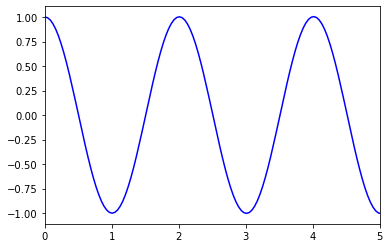

In [25]:
from matplotlib import pyplot as plt
plt.plot(t,wsol[:, 0], 'b-', label='x1')
# plt.plot(t,wsol[:, 1], 'g-', label='y1')
# plt.plot(t,wsol[:, 2], 'r', label='x2')
# plt.plot(t,wsol[:, 3], 'y', label='y2')
plt.xlim([0,5])

In [27]:
wsol[:,1]

array([ 1.        ,  0.9920995 ,  0.96852398,  0.92964724,  0.87608358,
        0.8086811 ,  0.72850643,  0.63682688,  0.53509238,  0.42491161,
        0.30802556,  0.18628184,  0.06160454, -0.06403606, -0.18865473,
       -0.31028246, -0.42699767, -0.53695657, -0.63842225, -0.72979215,
       -0.80962337, -0.87665533, -0.92982994, -0.96830842, -0.99148364,
       -0.99899076, -0.99071239, -0.96678059, -0.92757478, -0.87371566,
       -0.80605545, -0.72566433, -0.63381358, -0.53195546, -0.42170027,
       -0.30479077, -0.18307475, -0.05847587,  0.06703708,  0.19148069,
        0.31288872,  0.42934306,  0.53900404,  0.64013945,  0.73115197,
        0.81060433,  0.87724205,  0.93001311,  0.96808489,  0.99085699,
        0.99797083,  0.98931558,  0.96502901,  0.92549607,  0.87134265,
        0.80342569,  0.72281941,  0.63079848,  0.52881784,  0.4184897 ,
        0.30155799,  0.179871  ,  0.05535181, -0.07003209, -0.19429929,
       -0.31548636, -0.4316787 , -0.54104075, -0.64184507, -0.73